<a href="https://colab.research.google.com/github/chaseliutb/Study_ML/blob/master/yelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (147 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 134983 files and directories currently installed.)
Prep

     |████████████████████████████████| 2.8MB 2.8MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702074 sha256=5ea8031cc41673f3758f952672a8486bfa953e65439b5384f3624d2aff4d588c
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.4.2.post1
    Uninstalling pyproj-2.4.2.post1:
      Successfully uninstalled pyproj-2.4.2.post1


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import collections
import re, string
import sys
import time
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from mpl_toolkits.basemap import Basemap
from subprocess import check_output
import seaborn as sns

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
import json

def init_ds(json):
  ds = {}
  keys = json.keys()
  for k in keys:
    ds[k] = []
  return ds, keys
def read_json(file):
  dataset = {}
  keys = []
  with open(file) as file_lines:
    for count, line in enumerate(file_lines):
      data = json.loads(line.strip())
      if count == 0:
        dataset, keys = init_ds(data)
      for k in keys:
        dataset[k].append(data[k])
  return pd.DataFrame(dataset)


In [0]:
%%time

yelp_tips = read_json('drive/My Drive/yelp_dataset/tip.json')

CPU times: user 6.86 s, sys: 401 ms, total: 7.26 s
Wall time: 7.84 s


In [0]:
%%time
yelp_business = read_json('drive/My Drive/yelp_dataset/business.json')

CPU times: user 3.43 s, sys: 254 ms, total: 3.69 s
Wall time: 4.02 s


In [0]:
%%time
yelp_review = read_json('drive/My Drive/yelp_dataset/review.json')

CPU times: user 1min 10s, sys: 10.6 s, total: 1min 21s
Wall time: 2min 33s


In [0]:
%%time
yelp_user = read_json('drive/My Drive/yelp_dataset/user.json')

CPU times: user 29.7 s, sys: 2.49 s, total: 32.2 s
Wall time: 1min 6s


In [0]:
yelp_review["date"]=  pd.to_datetime(yelp_review["date"], format='%Y-%m-%d')
yelp_review['year'] = yelp_review.date.dt.year

In [0]:
yelp_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [0]:
yelp_tips.head()

,user_id,business_id,text,date,compliment_count
0,UPw5DWs_b-e2JRBS-t37Ag,VaKXUpmWTTWDKbpJ3aQdMw,"Great for watching games, ufc, and whatever el...",2014-03-27 03:51:24,0
1,Ocha4kZBHb4JK0lOWvE0sg,OPiPeoJiv92rENwbq76orA,Happy Hour 2-4 daily with 1/2 price drinks and...,2013-05-25 06:00:56,0
2,jRyO2V1pA4CdVVqCIOPc1Q,5KheTjYPu1HcQzQFtm4_vw,Good chips and salsa. Loud at times. Good serv...,2011-12-26 01:46:17,0
3,FuTJWFYm4UKqewaosss1KA,TkoyGi8J7YFjA6SbaRzrxg,The setting and decoration here is amazing. Co...,2014-03-23 21:32:49,0
4,LUlKtaM3nXd-E4N4uOk_fQ,AkL6Ous6A1atZejfZXn1Bg,Molly is definately taking a picture with Sant...,2012-10-06 00:19:27,0


In [0]:
yelp_review['length'] = yelp_review['text'].apply(len)
yelp_review.head()

useful_reviews = len(yelp_review[yelp_review["useful"]>0])
cool_reviews = len(yelp_review[yelp_review["cool"]>0])
funny_reviews = len(yelp_review[yelp_review["funny"]>0])
negative_reviws = len(yelp_review[yelp_review["stars"]<=3])
positive_reviews =len(yelp_review[yelp_review["stars"]>3])
total_reviews = len(yelp_review)

print("Total reviews: {}".format(total_reviews))
print("Useful reviews: {}".format(useful_reviews))
print("Funny reviews: {}".format(funny_reviews))
print("Cool reviews: {}".format(cool_reviews))
print("Total negative reviews: {}".format(negative_reviws))
print("Total positive reviews: {}".format(positive_reviews))

Total reviews: 6685900
Useful reviews: 3115446
Funny reviews: 1373727
Cool reviews: 1672612
Total negative reviews: 2283833
Total positive reviews: 4402067


In [0]:
top_reviewed = yelp_review[yelp_review["stars"]>3]
top_reviews_dict ={}

for business_id in top_reviewed["business_id"].values:
    try :
        top_reviews_dict[business_id] = top_reviews_dict[business_id]+1
    except:
        top_reviews_dict[business_id]=1
        
topbusiness = pd.DataFrame.from_dict(data= top_reviews_dict,orient="index")

topbusiness.reset_index(inplace=True)
topbusiness.columns = ['business_id', 'rated']
del(top_reviews_dict)
del(top_reviewed)

30 most rated business among business that received more than 3 stars.

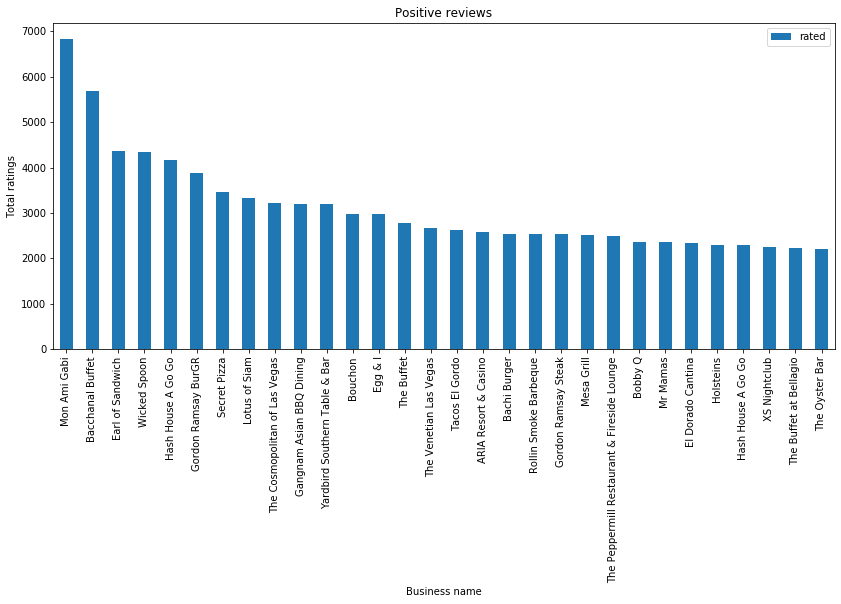

In [0]:
top_count = 30
right=pd.DataFrame(yelp_business[['business_id',"name","categories"]].values,
                    columns=['business_id',"Business name","categories"])

top_business_data = pd.merge(topbusiness,right=right, how="inner",on='business_id')
top_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Positive reviews').set_ylabel("Total ratings")

del(topbusiness)
del(right)

1000 most rated business

In [0]:
num_business = 1000
business_ids = top_business_data.sort_values("rated")[::-1][:num_business].business_id.values
#len(business_ids)
useful_b = yelp_business.loc[yelp_business['business_id'].isin(business_ids)]

plot a map

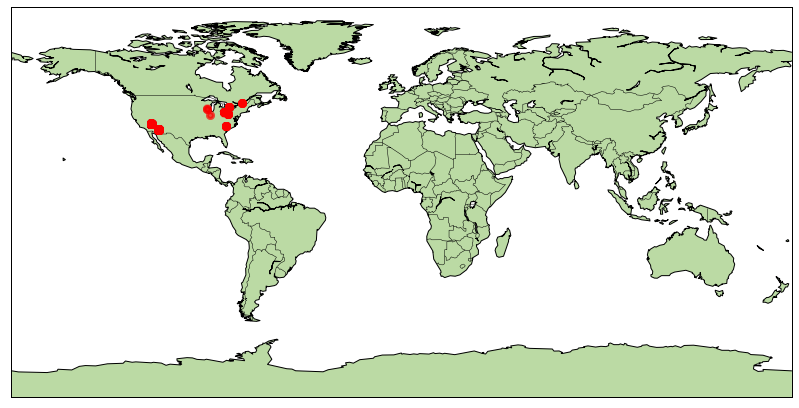

In [0]:
fig = plt.figure(figsize=(14, 8), edgecolor='w')

m = Basemap(projection='cyl',llcrnrlon= -180, urcrnrlon = 180,
            llcrnrlat = -90, urcrnrlat= 90,resolution='c',
           lat_ts = True)
m.drawcoastlines()
m.fillcontinents(color='#bbdaa4',lake_color='#FFFFFF')
m.drawcountries()
m.drawmapboundary(fill_color='#FFFFFF')

mloc = m(useful_b['latitude'].tolist(),useful_b['longitude'].tolist())
m.scatter(mloc[1],mloc[0],color ='red',lw=3,alpha=0.3,zorder=5)

Text(0, 0.5, 'Total occurance')

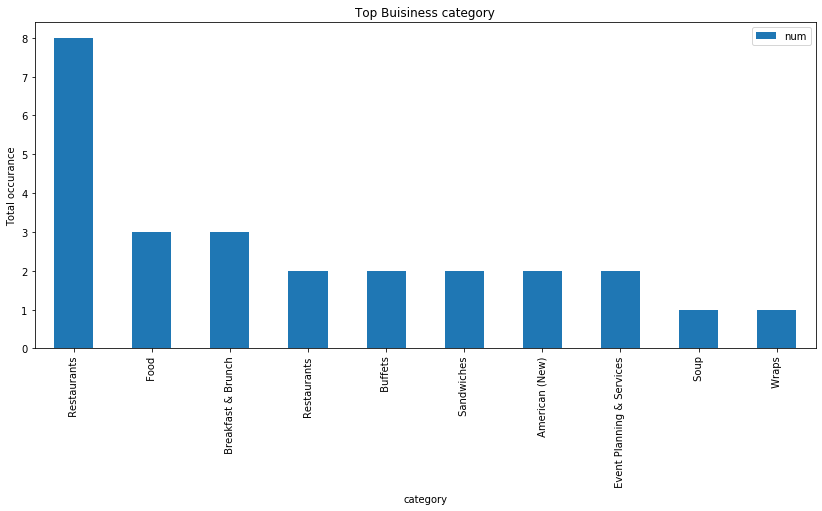

In [0]:
num_categories = 10
num_topbusiness = 1000
categories = {}
data = top_business_data.sort_values("rated")[::-1][:num_categories]
for category in data.categories.values:
  vals = category.split(",")
  for val in vals:
    try:
      categories[val] = categories[val] + 1
    except:
      categories[val] = 1
top_categories = pd.DataFrame.from_dict(categories, orient = "index")
top_categories.reset_index(inplace = True)
top_categories.columns = ['category', 'num']

top_categories.sort_values("num")[::-1][:num_categories].plot(x="category",y="num", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Top Buisiness category').set_ylabel("Total occurance")

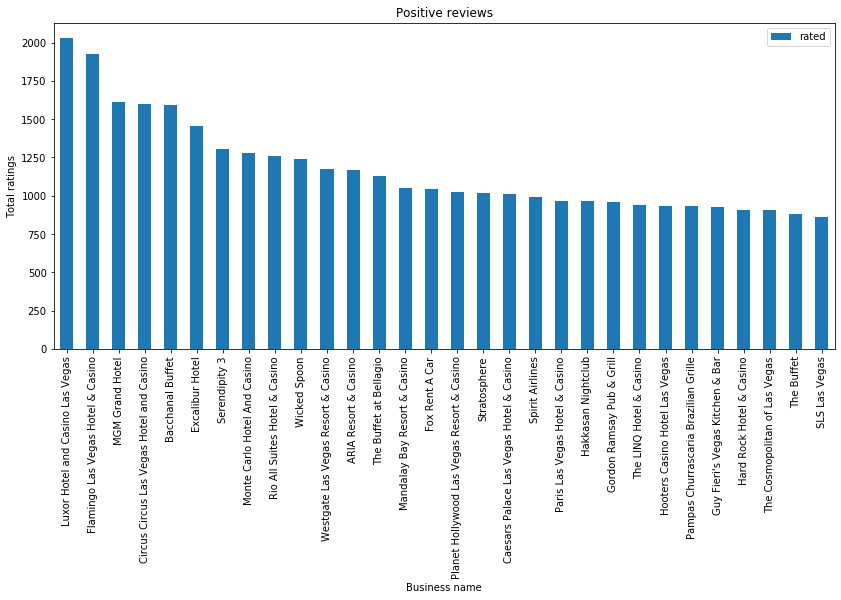

In [0]:
lowest_reviewd = yelp_review[yelp_review['stars'] < 3]
low_reviews_dict ={}

for business_id in lowest_reviewd["business_id"].values:
    try :
        low_reviews_dict[business_id] = low_reviews_dict[business_id]+1
    except:
        low_reviews_dict[business_id]=1
        
negbusiness = pd.DataFrame.from_dict(data= low_reviews_dict,orient="index")

negbusiness.reset_index(inplace=True)
negbusiness.columns = ['business_id', 'rated']
del(low_reviews_dict)
del(lowest_reviewd)

top_count = 30
right=pd.DataFrame(yelp_business[['business_id',"name","categories"]].values,
                    columns=['business_id',"Business name","categories"])

neg_business_data = pd.merge(negbusiness,right=right, how="inner",on='business_id')
neg_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Positive reviews').set_ylabel("Total ratings")

del(negbusiness)
del(right)

Text(0, 0.5, 'Total occurance')

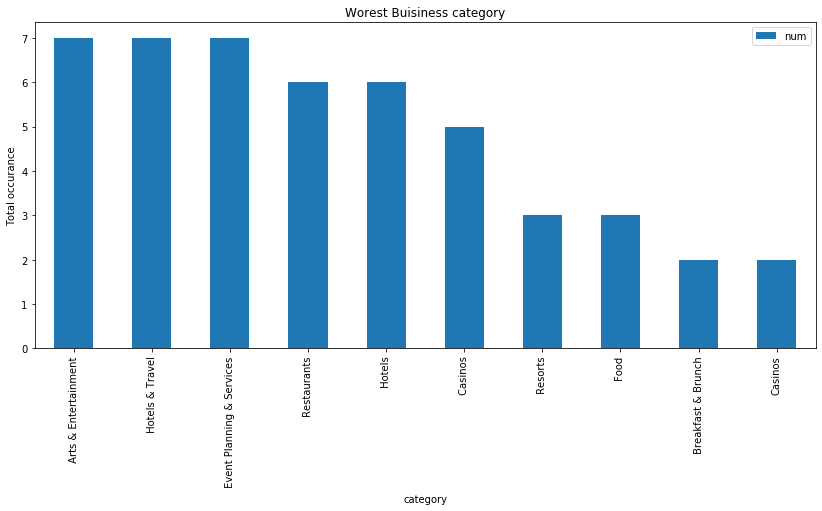

In [0]:
num_categories = 10
num_negbusiness = 1000
categories = {}
data = neg_business_data.sort_values("rated")[::-1][:num_categories]
for category in data.categories.values:
  vals = category.split(",")
  for val in vals:
    try:
      categories[val] = categories[val] + 1
    except:
      categories[val] = 1
neg_categories = pd.DataFrame.from_dict(categories, orient = "index")
neg_categories.reset_index(inplace = True)
neg_categories.columns = ['category', 'num']

neg_categories.sort_values("num")[::-1][:num_categories].plot(x="category",y="num", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Worest Buisiness category').set_ylabel("Total occurance")

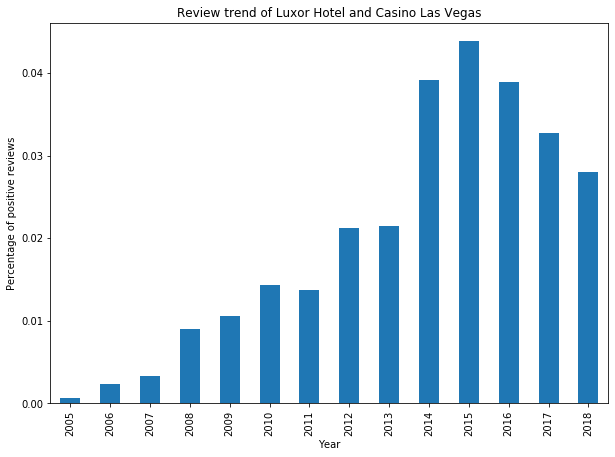

In [0]:
num_business = 1
business_ids = neg_business_data.sort_values("rated")[::-1][:num_business].business_id.values
business_names = neg_business_data.sort_values("rated")[::-1][:num_business]["Business name"].values
for i, business_id in enumerate(business_ids):
    useful_b = yelp_review.loc[yelp_review['business_id'] == business_id]
    total = len(useful_b)
    useful_b = useful_b.loc[useful_b['stars'] > 3]
    useful_b = useful_b.groupby(['year']).size().reset_index(name='counts')
    #print(useful_b.head())
    series = pd.Series(useful_b["counts"].values / total, index=useful_b["year"].values, name='Review trend')
    axes = series.plot(kind="bar",figsize=(10, 7))
    plt.xlabel('Year', axes=axes)
    plt.ylabel('Percentage of positive reviews', axes=axes)
    plt.title('Review trend of {}'.format(business_names[i]), axes=axes)
    plt.savefig("trend.png")
    plt.show()

In [0]:
def splitWords(s):
  word_list = re.findall(r'\w+', s.lower())
  filtered_words = [word for word in word_list if word not in stopwords.words('english')]
  return filtered_words

def count_ngrams(lines, min_length = 2, max_length = 4):
  lengths = range(min_length, max_length + 1)
  ngrams = {length: collections.Counter() for length in lengths}
  queue = collections.deque(maxlen=max_length)

  def add_queue():
    current = tuple(queue)
    for length in lengths:
      if(len(current) >= length):
        ngrams[length][current[:length]] += 1;

  for line in lines:
    for word in splitWords(line):
      queue.append(word)
      if len(queue) >= max_length:
        add_queue()

  while len(queue) > min_length:
    queue.popleft()
    add_queue()

  return ngrams

def print_most_freqent(ngrams, num = 10):
  for n in sorted(ngrams):
    print("------{} most common {} phase word".format(num, n))
    for gram, count in ngrams[n].most_common(num):
      print('{0}: {1}'.format(' '.join(gram), count))
    print('')

def print_word_cloud(ngrams, num = 5):
  words = []
  for n in sorted(ngrams):
    for gram, count in ngrams[n].most_common(num):
      s = ' '.join(gram)
      words.append(s)

  cloud = WordCloud(width=1440, height= 1080, max_words= 200, background_color = 'white').generate(' '.join(words))
  plt.figure(figsize=(20, 15))
  plt.imshow(cloud)
  plt.axis('off');
  plt.show()
  print('')
  cloud.to_file('neg.png')



Analysing business:  Luxor Hotel and Casino Las Vegas
------10 most common 2 phase word
front desk: 340
resort fee: 170
customer service: 157
las vegas: 152
mandalay bay: 133
stay luxor: 108
room service: 96
never stay: 84
next day: 71
first time: 69

------10 most common 3 phase word
called front desk: 60
blue man group: 36
non smoking room: 25
mandalay bay excalibur: 22
call front desk: 18
front desk told: 18
room smelled like: 17
stay somewhere else: 17
las vegas strip: 16
front desk said: 16



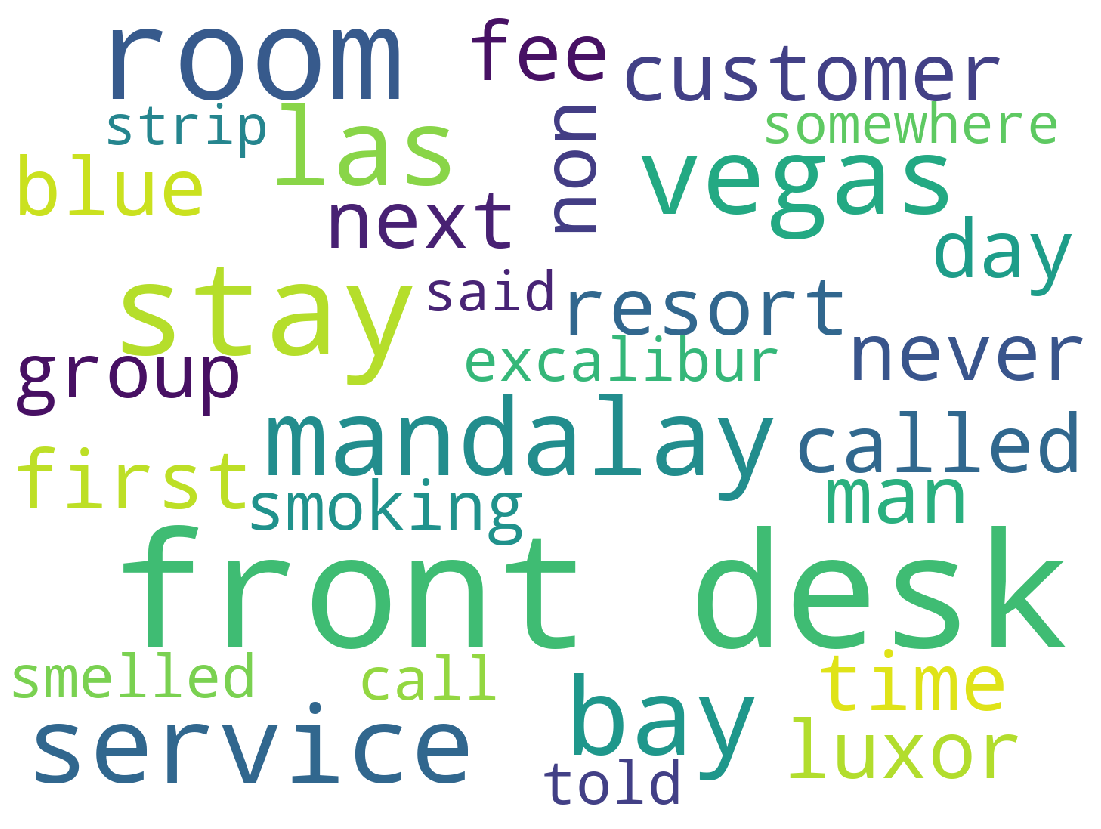

In [0]:
num_business_analysis = 1 # basically this will tell how much computing and diverse our analysis will be
business_ids=neg_business_data.sort_values("rated")[::-1][:num_business_analysis].business_id.values
business_names = neg_business_data.sort_values("rated")[::-1][:num_business_analysis]["Business name"].values
# get all the reviews and analyse them
#business_names
for i, business_id in enumerate(business_ids):
  print("Analysing business: ",business_names[i])
  reviews = yelp_review.loc[yelp_review['business_id'] == business_id]
  reviews = reviews.loc[reviews['year'] >= 2015]
  reviews = reviews.loc[reviews["stars"] <= 3].text.values
  most_used_text = count_ngrams(reviews, min_length = 2, max_length = 3)
  print_most_freqent(most_used_text, num=10)
  print_word_cloud(most_used_text, 10)
  #print ("total reviews ",len(reviews))
    

In [0]:
from google.colab import files
files.download("pos.png")    

In [0]:
import os
print( os.getcwd() )
print( os.listdir() )


/content
['.config', 'neg.png', 'drive', 'sample_data']


Analysing business:  Mon Ami Gabi
------10 most common 2 phase word
mon ami: 2100
ami gabi: 1782
onion soup: 1088
bellagio fountains: 1070
view bellagio: 853
las vegas: 843
french onion: 785
steak frites: 758
eggs benedict: 606
filet mignon: 589

------10 most common 3 phase word
mon ami gabi: 1765
french onion soup: 756
view bellagio fountains: 458
bellagio water show: 258
bellagio fountain show: 183
corned beef hash: 174
view bellagio fountain: 168
great view bellagio: 167
filet mignon merlot: 157
bloody mary bar: 155



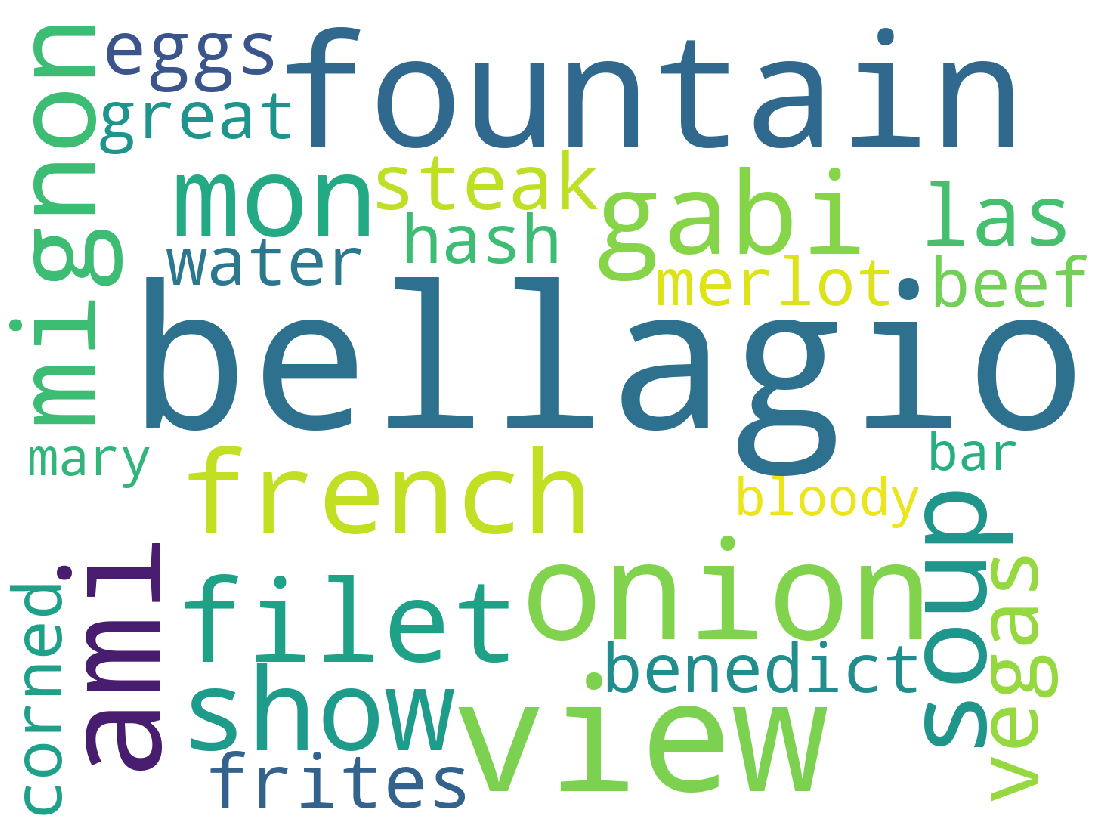

In [0]:
num_business_analysis = 1 # basically this will tell how much computing and diverse our analysis will be
business_ids=top_business_data.sort_values("rated")[::-2][:num_business_analysis].business_id.values
business_names = top_business_data.sort_values("rated")[::-2][:num_business_analysis]["Business name"].values
# get all the reviews and analyse them
#business_names
for i, business_id in enumerate(business_ids):
  print("Analysing business: ",business_names[i])
  reviews = yelp_review.loc[yelp_review['business_id'] == business_id].text.values
  most_used_text = count_ngrams(reviews, min_length = 2, max_length = 3)
  print_most_freqent(most_used_text, num=10)
  print_word_cloud(most_used_text, 10)
  #print ("total reviews ",len(reviews))

relation between starts and review length

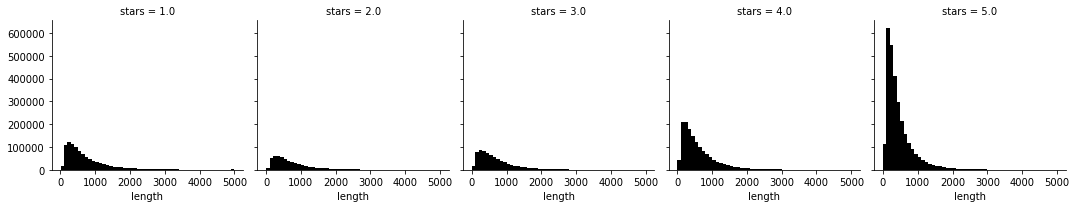

In [0]:
graph = sns.FacetGrid(data=yelp_review,col='stars')
graph.map(plt.hist,'length',bins=50,color='black')
graph.savefig("output.png")